# Task 1

In [1]:
import pandas as pd

df = pd.read_csv("data/task1.csv")

Question 1:

Use .info() to examine the general structure of the data

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


Display the first five rows with .head()

In [3]:
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Display the last five rows with .tail()

In [4]:
print(df.tail())

     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


Use .describe() to get a statistical summary of numerical columns

In [5]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Question 2:

In [6]:
print(df.dtypes)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

copy_df = df.copy()

object_cols = copy_df.select_dtypes(include=['object']).columns

for col in object_cols:
    copy_df[col] = copy_df[col].astype(str)
    copy_df[col] = label_encoder.fit_transform(copy_df[col])

print(copy_df.dtypes)
print(copy_df.head())


survived         int64
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked         int64
class            int64
who              int64
adult_male        bool
deck             int64
embark_town      int64
alive            int64
alone             bool
dtype: object
   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  deck  embark_town  alive  alone  
0        True     7            2      0  False  
1       False     2            0      1  False  
2       False     7

Question 3:

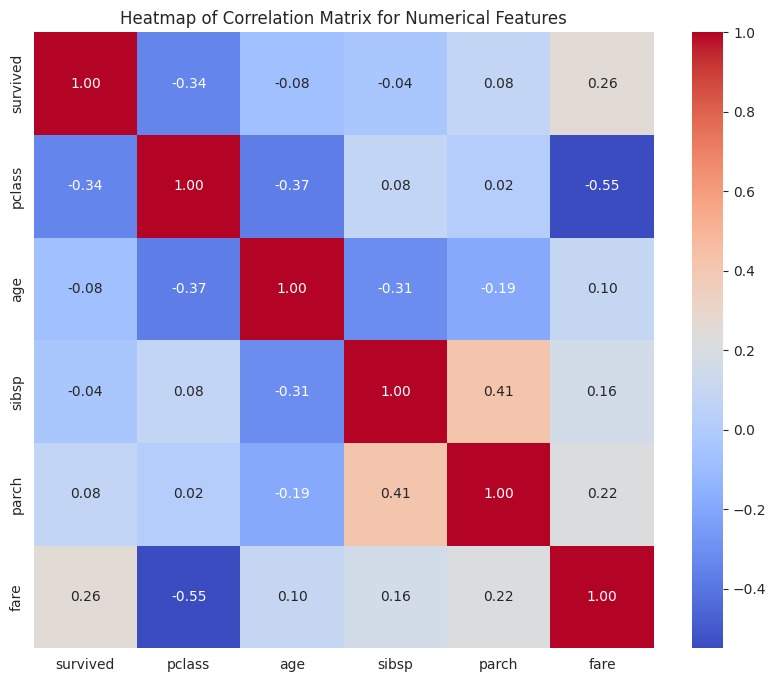

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Numerical Features')
plt.show()


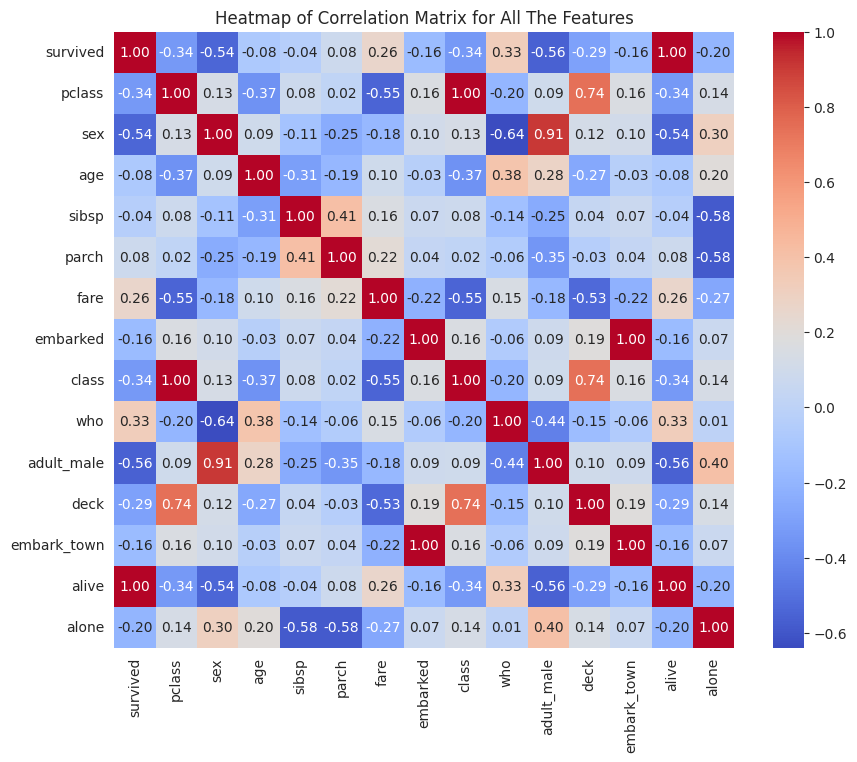

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#numerical_df = df.select_dtypes(include=['number'])

corr_matrix = copy_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix for All The Features')
plt.show()

Question 4:

In [10]:
columns_to_remove = [col for col in corr_matrix.columns if any((corr_matrix[col] == 1) & (corr_matrix[col].index != col))]

df_reduced = df.drop(columns=columns_to_remove)
print(df_reduced.head())

      sex   age  sibsp  parch     fare    who  adult_male deck  alone
0    male  22.0      1      0   7.2500    man        True  NaN  False
1  female  38.0      1      0  71.2833  woman       False    C  False
2  female  26.0      0      0   7.9250  woman       False  NaN   True
3  female  35.0      1      0  53.1000  woman       False    C  False
4    male  35.0      0      0   8.0500    man        True  NaN   True


In [11]:
columns_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] == 1:
            columns_to_drop.append(corr_matrix.columns[j])

columns_to_drop = list(set(columns_to_drop))

df_cleaned = copy_df.drop(columns=columns_to_drop)
print(df_cleaned.head())


   survived  pclass  sex   age  sibsp  parch     fare  embarked  who  \
0         0       3    1  22.0      1      0   7.2500         2    1   
1         1       1    0  38.0      1      0  71.2833         0    2   
2         1       3    0  26.0      0      0   7.9250         2    2   
3         1       1    0  35.0      1      0  53.1000         2    2   
4         0       3    1  35.0      0      0   8.0500         2    1   

   adult_male  deck  alone  
0        True     7  False  
1       False     2  False  
2       False     7   True  
3       False     2  False  
4        True     7   True  


Question 5:

In [12]:
survived_df = df_cleaned[df_cleaned['survived'] == 1]

print(f'Number of passengers who survived: {survived_df["survived"].sum()}')

Number of passengers who survived: 342


Question 6:

In [13]:
female_over_30_count = df_cleaned[(df_cleaned['sex'] == 0) & (df_cleaned['age'] > 30)].shape[0]
print(f"Number of female passengers aged more than 30 years: {female_over_30_count}")

Number of female passengers aged more than 30 years: 103


Question 7:

In [14]:
cherbourg_high_fare_count = df[(df['embarked'] == 'C') & (df['fare'] > 100)].shape[0]
print(f"Number of passengers who embarked from Cherbourg and paid a fare greater than $100: {cherbourg_high_fare_count}")


Number of passengers who embarked from Cherbourg and paid a fare greater than $100: 29


Question 8:

identifing the columns that have missing values:

In [15]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:", missing_columns)

Columns with missing values: age            177
embarked         2
deck           688
embark_town      2
dtype: int64


For numerical columns: Fill missing values with the median of that column. The median is chosen because it's robust to outliers, providing a more representative fill value for skewed distributions than the mean.

For categorical columns: Fill missing values with the mode (the most frequent value) of that column. The mode is chosen as it represents the most common category within the data.

In [16]:
for column in missing_columns.index:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [17]:
missing_values_after = df.isnull().sum()
missing_columns_after = missing_values_after[missing_values_after > 0]
print("Columns with missing values after filling:", missing_columns_after.shape[0])

Columns with missing values after filling: 0


Question 9:

In [18]:
average_age = df['age'].mean()

average_age_female = df[df['sex'] == 'female']['age'].mean()

average_age_male = df[df['sex'] == 'male']['age'].mean()

print(f"Average age of passengers: {average_age}")
print(f"Average age for females: {average_age_female}")
print(f"Average age for males: {average_age_male}")


Average age of passengers: 29.36158249158249
Average age for females: 27.929936305732483
Average age for males: 30.14067590987868


Question 10:

In [19]:
correlation_fare_survival = df_cleaned[['fare', 'survived']].corr().iloc[0, 1]

print(f"Correlation between fare paid and survival rate: {correlation_fare_survival}")


Correlation between fare paid and survival rate: 0.2573065223849626


According to the low number, it seems there is no strong relation between those two, cause it's close to zero. and if we could conclude something from this correlation number, it would be a positive correlation however it's not strong.

Question 11:

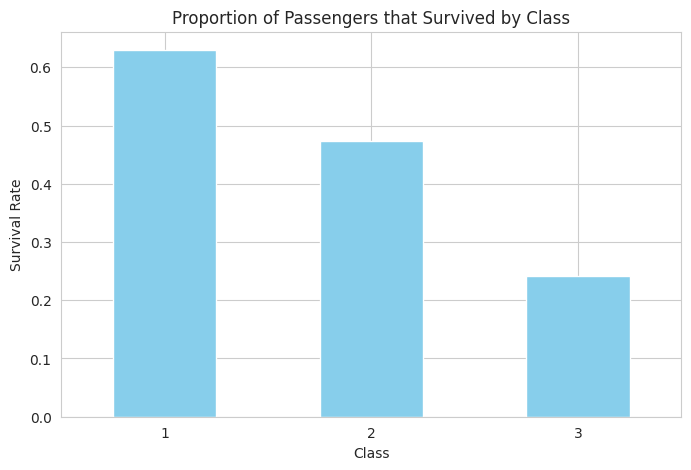

In [20]:
survival_rates_by_class = df.groupby('pclass')['survived'].mean()

plt.figure(figsize=(8, 5))
survival_rates_by_class.plot(kind='bar', color='skyblue')
plt.title('Proportion of Passengers that Survived by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


Question 12:

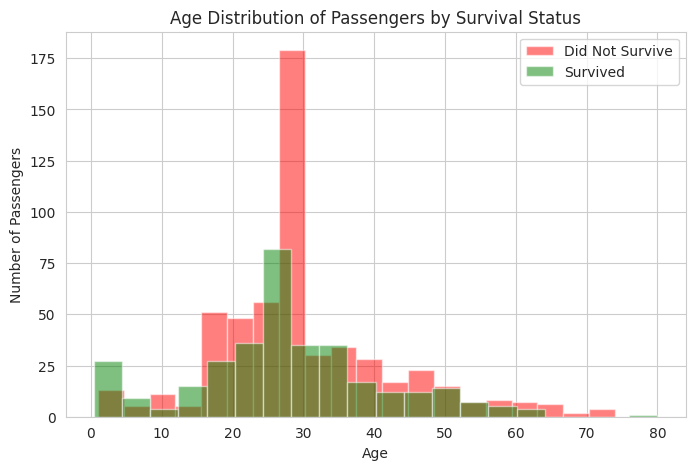

In [21]:
plt.figure(figsize=(8, 5))
df[df['survived'] == 0]['age'].hist(bins=20, alpha=0.5, label='Did Not Survive', color='red')
df[df['survived'] == 1]['age'].hist(bins=20, alpha=0.5, label='Survived', color='green')
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

Question 13:

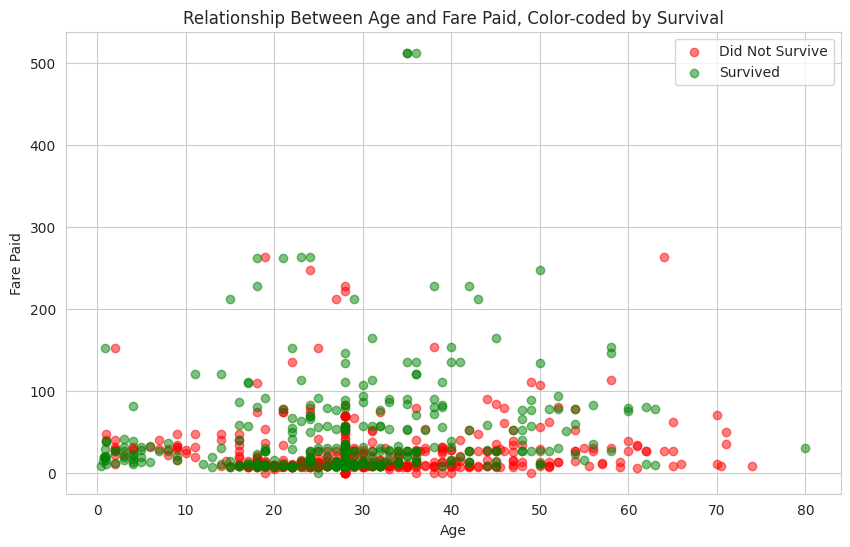

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['survived'] == 0]['age'], df[df['survived'] == 0]['fare'], color='red', alpha=0.5, label='Did Not Survive')
plt.scatter(df[df['survived'] == 1]['age'], df[df['survived'] == 1]['fare'], color='green', alpha=0.5, label='Survived')
plt.title('Relationship Between Age and Fare Paid, Color-coded by Survival')
plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.legend()
plt.show()

Question 14:

In [23]:
pivot_table = df.pivot_table(index=['pclass', 'sex'], values=['fare', 'survived'], aggfunc={'fare': 'mean', 'survived': 'mean'})
print(pivot_table)


                     fare  survived
pclass sex                         
1      female  106.125798  0.968085
       male     67.226127  0.368852
2      female   21.970121  0.921053
       male     19.741782  0.157407
3      female   16.118810  0.500000
       male     12.661633  0.135447


Question 15:

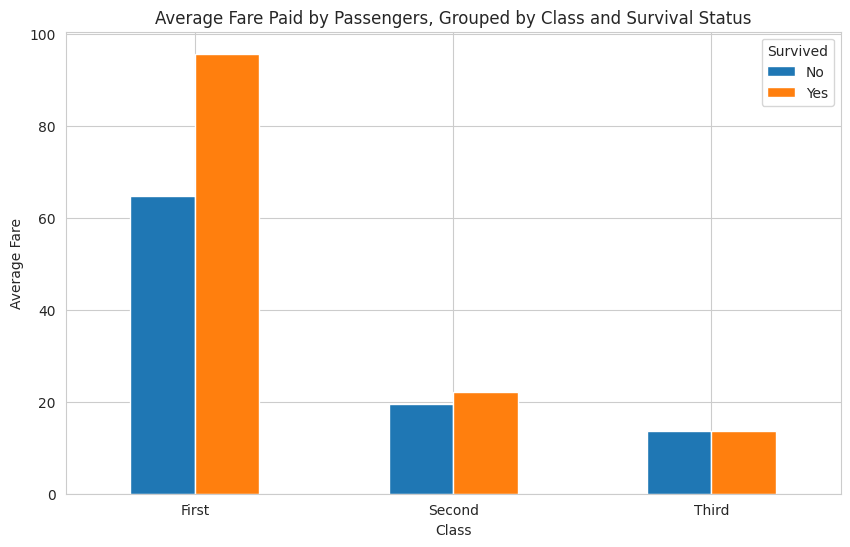

In [24]:
grouped_data = df.groupby(['pclass', 'survived'])['fare'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare Paid by Passengers, Grouped by Class and Survival Status')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.xticks(ticks=[0, 1, 2], labels=['First', 'Second', 'Third'], rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
